In [1]:
import os
import glob
import pylab as pl
import numpy as np
import astropy.io.fits as fits

from   astropy.table import Table, vstack, join
from   desitarget.sv1.sv1_targetmask import scnd_mask

In [2]:
vi_root = '/global/cfs/cdirs/desi/users/mjwilson/DESILBGSPEC/f3/v4.1/tiles/cumulative/80871/20210430/'

In [3]:
vis     = sorted(glob.glob(vi_root + '*.csv'))

In [4]:
tabs    = []

for vi in vis:    
    fp = os.path.basename(vi).split('_')
    vi = Table.read(vi)

    vi['DESILBG_TYPE'] = fp[3]
    vi['PETAL']        = fp[5]
    vi['SPLIT']        = fp[7]
    vi['VI_spectype']  = vi['VI_spectype'].data.astype(str)
    
    del vi['Redrock_version']
    del vi['Template_version']
    del vi['Redrock_spectype']
    
    for name in vi.dtype.names:
        vi.rename_column(name, name.upper())
    
    tabs.append(vi)

In [5]:
vis = vstack(tabs)
vis

TARGETID,TILEID,SPEC_VERSION,REDROCK_Z,REDROCK_DELTACHI2,VI_SCANNER,VI_QUALITY,VI_ISSUE,VI_Z,VI_SPECTYPE,VI_COMMENT,DESILBG_TYPE,PETAL,SPLIT
int64,int64,str14,float64,float64,str4,int64,int64,float64,str21,str78,str3,str1,str7
243310933311516,80871,0.47.1.dev6182,1.3841,7.5,MJW,3,--,3.583,--,Sig. Lya; Si IV; Si II; SV;,BXU,0,1
243310937505827,80871,0.47.1.dev6182,1.4998,16.0,MJW,2,--,2.24,--,Potential Lya; SiIV; SiV.,BXU,0,1
243310933311540,80871,0.47.1.dev6182,1.6609,0.7,MJW,2,--,2.7209,--,Lya;; NV; Si II C II;,BXU,0,1
243310937505846,80871,0.47.1.dev6182,0.0006,87.1,MJW,3,--,0.0006,--,--,BXU,0,1
243310937505870,80871,0.47.1.dev6182,0.53,4.7,MJW,3,--,2.4942,--,Sig. Lya; Si IV;,BXU,0,1
243310937505819,80871,0.47.1.dev6182,0.5178,4.1,MJW,3,--,2.4978,--,Sig. Lya,BXU,0,1
243310933311518,80871,0.47.1.dev6182,0.1887,6.3,MJW,3,--,3.8987,--,Sig. Lya; CII; SiV,BXU,0,1
243310937505821,80871,0.47.1.dev6182,0.3445,11.5,MJW,1,--,2.8845,--,--,BXU,0,1
243304893513751,80871,0.47.1.dev6182,1.6283,0.6,MJW,3,--,2.7999,--,Sig. Lya; LyB? SiII; SiV;,BXU,0,1


In [6]:
vis.dtype.names

('TARGETID',
 'TILEID',
 'SPEC_VERSION',
 'REDROCK_Z',
 'REDROCK_DELTACHI2',
 'VI_SCANNER',
 'VI_QUALITY',
 'VI_ISSUE',
 'VI_Z',
 'VI_SPECTYPE',
 'VI_COMMENT',
 'DESILBG_TYPE',
 'PETAL',
 'SPLIT')

In [7]:
np.unique(vis['DESILBG_TYPE'].data, return_counts=True)

(array(['BXU', 'G', 'TMG'], dtype='<U3'), array([365,  88, 145]))

In [8]:
np.unique(vis['VI_QUALITY'].data, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([ 67,  13,  72, 125, 188, 133]))

In [9]:
desilbg_gold = vis[vis['VI_QUALITY'] >= 3]
desilbg_gold

TARGETID,TILEID,SPEC_VERSION,REDROCK_Z,REDROCK_DELTACHI2,VI_SCANNER,VI_QUALITY,VI_ISSUE,VI_Z,VI_SPECTYPE,VI_COMMENT,DESILBG_TYPE,PETAL,SPLIT
int64,int64,str14,float64,float64,str4,int64,int64,float64,str21,str78,str3,str1,str7
243310933311516,80871,0.47.1.dev6182,1.3841,7.5,MJW,3,--,3.583,--,Sig. Lya; Si IV; Si II; SV;,BXU,0,1
243310937505846,80871,0.47.1.dev6182,0.0006,87.1,MJW,3,--,0.0006,--,--,BXU,0,1
243310937505870,80871,0.47.1.dev6182,0.53,4.7,MJW,3,--,2.4942,--,Sig. Lya; Si IV;,BXU,0,1
243310937505819,80871,0.47.1.dev6182,0.5178,4.1,MJW,3,--,2.4978,--,Sig. Lya,BXU,0,1
243310933311518,80871,0.47.1.dev6182,0.1887,6.3,MJW,3,--,3.8987,--,Sig. Lya; CII; SiV,BXU,0,1
243304893513751,80871,0.47.1.dev6182,1.6283,0.6,MJW,3,--,2.7999,--,Sig. Lya; LyB? SiII; SiV;,BXU,0,1
243316973109325,80871,0.47.1.dev6182,2.9302,495.7,MJW,4,--,2.9302,--,--,BXU,0,1
243323017101380,80871,0.47.1.dev6182,0.4883,12.3,MJW,3,--,3.1847,--,Sig. Lya;,BXU,0,1
243323021295803,80871,0.47.1.dev6182,0.2958,8.1,MJW,3,--,2.9158,--,Sig. asym. Lya,BXU,0,1


Text(0.5, 0, '$z$')

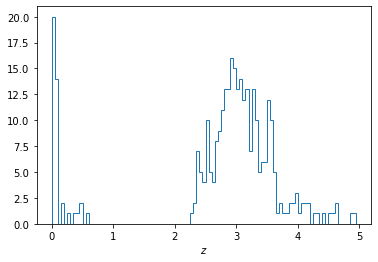

In [10]:
_ = pl.hist(desilbg_gold['VI_Z'], histtype='step', bins=np.arange(0.0, 5.0, 0.05))

pl.xlabel('$z$')

In [11]:
np.unique(desilbg_gold['DESILBG_TYPE'].data, return_counts=True)

(array(['BXU', 'G', 'TMG'], dtype='<U3'), array([194,  43,  84]))

In [12]:
tpaths = ['/global/cfs/cdirs/desi/users/mjwilson/DESILBG/GOLD/DESILBG_BXU/desilbg_bxu.fits',\
          '/global/cfs/cdirs/desi/users/mjwilson/DESILBG/GOLD/DESILBG_G/desilbg_g.fits',\
          '/global/cfs/cdirs/desi/users/mjwilson/DESILBG/GOLD/DESILBG_TMG/desilbg_tmg.fits']

In [13]:
targets = []

for tpath in tpaths:
    tab = Table.read(tpath)
    
    tt  = tpath.split('_')[-1].replace('.fits', '') 

    tab['DESILBG_TYPE'] = tt.upper()
    tab['SCND_ORDER']   = np.arange(len(tab))
    
    for name in tab.dtype.names:
        tab.rename_column(name, name.upper())
    
    targets.append(tab)
    
targets = vstack(targets)
targets

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,U,US,G,R,I,Z,Y,YV,J,H,KS,U_ERR,US_ERR,G_ERR,R_ERR,I_ERR,Z_ERR,Y_ERR,YV_ERR,J_ERR,H_ERR,KS_ERR,Z_BC03,Z_SPEC,IDX,DESILBG_TYPE,SCND_ORDER
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3,int64
8419,149.4617628929257,2.9903850477809484,0,7,True .. False,0.020243416666075105,23.675,23.65,22.892,22.691,22.622,22.578,22.511,-99.024,-99.018,-99.011,-99.007,0.021,0.034,0.01,0.012,0.015,0.023,0.053,1000.0,1000.0,1000.0,1000.0,2.4898,-99.0,1,BXU,0
88187,149.37526777692952,2.9556887260343148,0,7,True .. False,0.019585939259879757,-99.094,24.677,23.381,22.545,22.342,22.054,21.399,-99.024,-99.017,-99.011,-99.007,-99.0,0.696,0.145,0.09,0.097,0.119,0.155,1000.0,1000.0,1000.0,1000.0,0.2746,-99.0,1,BXU,1
100735,149.37250768438415,3.080247775303863,0,7,True .. False,0.02390167866876377,27.69,26.458,23.672,22.514,22.389,22.151,22.334,-99.029,-99.021,-99.013,-99.009,0.318,0.214,0.009,0.004,0.005,0.006,0.016,1000.0,1000.0,1000.0,1000.0,3.7247,-99.0,1,BXU,2
106891,149.26462324656055,3.138785382887629,0,7,True .. False,0.024554265238280946,28.77,26.622,23.672,22.684,22.54,22.395,22.341,-99.03,-99.021,-99.014,-99.009,1.004,0.583,0.011,0.006,0.007,0.009,0.021,1000.0,1000.0,1000.0,1000.0,3.3393,-99.0,1,BXU,3
111902,149.40201064798677,3.188692373436244,0,7,True .. False,0.026667250492997518,-99.128,-99.125,23.675,22.707,22.365,22.301,22.276,-99.032,-99.023,-99.015,-99.01,-99.0,-99.0,0.008,0.005,0.004,0.007,0.016,1000.0,1000.0,1000.0,1000.0,0.2653,-99.0,1,BXU,4
179692,149.2142386139038,3.035434124404831,0,7,True .. False,0.02206308294569944,25.033,24.987,23.222,22.746,22.615,22.398,22.207,-99.027,-99.019,-99.012,-99.008,0.034,0.061,0.007,0.006,0.006,0.008,0.017,1000.0,1000.0,1000.0,1000.0,2.8799,-99.0,1,BXU,5
187353,149.21004001927372,3.1048311728256377,0,7,True .. False,0.023687506772805567,24.17,24.214,22.832,22.504,22.51,22.28,22.091,-99.029,-99.021,-99.013,-99.009,0.014,0.058,0.004,0.004,0.006,0.007,0.015,1000.0,1000.0,1000.0,1000.0,2.6679,-99.0,1,BXU,6
207591,149.06917248324245,3.295965274880494,0,7,True .. False,0.02155887279464575,27.146,24.478,23.815,22.621,21.967,21.487,20.579,-99.026,-99.019,-99.012,-99.008,2.205,0.374,0.132,0.05,0.044,0.044,0.04,1000.0,1000.0,1000.0,1000.0,1.4065,-99.0,1,BXU,7
281969,148.94066654619888,3.1817781279042285,0,3,True .. False,0.018371882773363733,23.009,-99.086,22.54,22.548,22.222,22.094,22.229,-99.022,-99.016,-99.01,-99.007,0.005,1000.0,0.004,0.005,0.005,0.007,0.019,1000.0,1000.0,1000.0,1000.0,2.0169,-99.0,1,BXU,8


In [14]:
scnd = Table.read('/global/cfs/cdirs/desi/survey/fiberassign/SV1/20210314/080871-scnd.fits')
targ = Table.read('/global/cfs/cdirs/desi/survey/fiberassign/SV1/20210314/080871-targ.fits')

In [15]:
sorted(scnd_mask.names())

['BACKUP_CALIB',
 'BHB',
 'BRIGHT_HPM',
 'BRIGHT_TOO',
 'DARK_TOO',
 'DC3R2_GAMA',
 'DESILBG_BXU_FINAL',
 'DESILBG_G_FINAL',
 'DESILBG_TMG_FINAL',
 'FAINT_HPM',
 'FIRST_MALS',
 'GAL_CLUS_2ND',
 'GAL_CLUS_BCG',
 'GAL_CLUS_SAT',
 'HETDEX_HP',
 'HETDEX_MAIN',
 'HPM_SOUM',
 'HSC_HIZ_SNE',
 'ISM_CGM_QGP',
 'LBG_TOMOG_COSMOS_FINAL',
 'LBG_TOMOG_W3',
 'LBG_TOMOG_XMM',
 'LOW_MASS_AGN',
 'LOW_Z',
 'M31_KNOWN',
 'M31_QSO',
 'M31_STAR',
 'MWS_CALIB',
 'MWS_CLUS_GAL_DEEP',
 'MWS_MAIN_CLUSTER_SV',
 'MWS_RRLYR',
 'PSF_OUT_BRIGHT',
 'PSF_OUT_DARK',
 'PV_BRIGHT',
 'PV_DARK',
 'QSO_RED',
 'SN_HOSTS',
 'SPCV',
 'STRONG_LENS',
 'UDG',
 'UNWISE_BLUE',
 'UNWISE_BLUE_BRIGHT_II',
 'UNWISE_BLUE_FAINT_II',
 'UNWISE_GREEN',
 'UNWISE_GREEN_II_3700',
 'UNWISE_GREEN_II_3800',
 'UNWISE_GREEN_II_3900',
 'UNWISE_GREEN_II_4000',
 'VETO',
 'WD_BINARIES_BRIGHT',
 'WD_BINARIES_DARK',
 'WISE_VAR_QSO']

In [16]:
sorted(scnd.dtype.names)

['DEC',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'GAIA_ASTROMETRIC_EXCESS_NOISE',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'NUMOBS',
 'NUMOBS_INIT',
 'NUMOBS_MORE',
 'OBSCONDITIONS',
 'OVERRIDE',
 'PARALLAX',
 'PMDEC',
 'PMRA',
 'PRIORITY',
 'PRIORITY_INIT',
 'RA',
 'REF_EPOCH',
 'SCND_ORDER',
 'SUBPRIORITY',
 'SV1_DESI_TARGET',
 'SV1_SCND_TARGET',
 'TARGETID',
 'TARGET_STATE',
 'TIMESTAMP',
 'VERSION',
 'Z',
 'ZWARN']

In [17]:
np.count_nonzero((scnd['SV1_SCND_TARGET'] & scnd_mask['DESILBG_BXU_FINAL']) != 0)

12103

In [18]:
scnd_bxu = scnd[(scnd['SV1_SCND_TARGET'] & scnd_mask['DESILBG_BXU_FINAL']) != 0]
scnd_bxu.sort('SCND_ORDER')
scnd_bxu

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,FLUX_G,FLUX_R,FLUX_Z,PARALLAX,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,GAIA_ASTROMETRIC_EXCESS_NOISE,TARGETID,SV1_DESI_TARGET,SV1_SCND_TARGET,SCND_ORDER,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,Z,ZWARN,TARGET_STATE,TIMESTAMP,VERSION,PRIORITY
deg,deg,mas / yr,mas / yr,yr,,nanomaggy,nanomaggy,nanomaggy,mas,mag,mag,mag,,,,,,,,,,,,,,,s,,
float64,float64,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int32,float64,int32,int64,int64,int64,int64,float64,int64,bytes15,bytes19,bytes14,int64
149.4617628929257,2.9903850477809484,0.0,0.0,2021.2006,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353203507200,4611686018427387904,36028797018963968,0,1.0,1,3800,1,1,0,0.0,0,UNOBS,2021-03-15T01:31:44,2.1.1.dev2706,3800
149.37526777692952,2.9556887260343148,0.0,0.0,2021.2006,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353203507201,4611686018427387904,36028797018963968,1,0.9999174031551995,1,3800,1,1,0,0.0,0,UNOBS,2021-03-15T01:31:44,2.1.1.dev2706,3800
149.37250768438415,3.080247775303863,0.0,0.0,2021.2006,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353203507202,4611686018427387904,36028797018963968,2,0.9998348063103989,1,3800,1,1,0,0.0,0,UNOBS,2021-03-15T01:31:44,2.1.1.dev2706,3800
149.26462324656055,3.138785382887629,0.0,0.0,2021.2006,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243359239110656,4611686018427387904,36028797018963968,3,0.9997522094655984,1,3800,1,1,0,0.0,0,UNOBS,2021-03-15T01:31:44,2.1.1.dev2706,3800
149.40201064798677,3.188692373436244,0.0,0.0,2021.2006,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243359239110657,4611686018427387904,36028797018963968,4,0.9996696126207979,1,3800,1,1,0,0.0,0,UNOBS,2021-03-15T01:31:44,2.1.1.dev2706,3800
149.2142386139038,3.035434124404831,0.0,0.0,2021.2006,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353199312896,4611686018427387904,36028797018963968,5,0.9995870157759974,1,3800,1,1,0,0.0,0,UNOBS,2021-03-15T01:31:44,2.1.1.dev2706,3800
149.21004001927372,3.1048311728256377,0.0,0.0,2021.2006,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353199312897,4611686018427387904,36028797018963968,6,0.9995044189311968,1,3800,1,1,0,0.0,0,UNOBS,2021-03-15T01:31:44,2.1.1.dev2706,3800
149.06917248324245,3.295965274880494,0.0,0.0,2021.2006,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243359234916352,4611686018427387904,36028797018963968,7,0.9994218220863963,1,3800,1,1,0,0.0,0,UNOBS,2021-03-15T01:31:44,2.1.1.dev2706,3800


In [19]:
sorted(scnd_bxu.dtype.names)

['DEC',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'GAIA_ASTROMETRIC_EXCESS_NOISE',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'NUMOBS',
 'NUMOBS_INIT',
 'NUMOBS_MORE',
 'OBSCONDITIONS',
 'OVERRIDE',
 'PARALLAX',
 'PMDEC',
 'PMRA',
 'PRIORITY',
 'PRIORITY_INIT',
 'RA',
 'REF_EPOCH',
 'SCND_ORDER',
 'SUBPRIORITY',
 'SV1_DESI_TARGET',
 'SV1_SCND_TARGET',
 'TARGETID',
 'TARGET_STATE',
 'TIMESTAMP',
 'VERSION',
 'Z',
 'ZWARN']

In [20]:
scnd_bxu = scnd_bxu['TARGETID', 'RA', 'DEC', 'SCND_ORDER', 'OVERRIDE', 'PRIORITY_INIT', 'SUBPRIORITY', 'SV1_DESI_TARGET', 'SV1_SCND_TARGET', 'VERSION']
scnd_bxu

TARGETID,RA,DEC,SCND_ORDER,OVERRIDE,PRIORITY_INIT,SUBPRIORITY,SV1_DESI_TARGET,SV1_SCND_TARGET,VERSION
,deg,deg,,,,,,,
int64,float64,float64,int32,bool,int64,float64,int64,int64,bytes14
243353203507200,149.4617628929257,2.9903850477809484,0,True,3800,1.0,4611686018427387904,36028797018963968,2.1.1.dev2706
243353203507201,149.37526777692952,2.9556887260343148,1,True,3800,0.9999174031551995,4611686018427387904,36028797018963968,2.1.1.dev2706
243353203507202,149.37250768438415,3.080247775303863,2,True,3800,0.9998348063103989,4611686018427387904,36028797018963968,2.1.1.dev2706
243359239110656,149.26462324656055,3.138785382887629,3,True,3800,0.9997522094655984,4611686018427387904,36028797018963968,2.1.1.dev2706
243359239110657,149.40201064798677,3.188692373436244,4,True,3800,0.9996696126207979,4611686018427387904,36028797018963968,2.1.1.dev2706
243353199312896,149.2142386139038,3.035434124404831,5,True,3800,0.9995870157759974,4611686018427387904,36028797018963968,2.1.1.dev2706
243353199312897,149.21004001927372,3.1048311728256377,6,True,3800,0.9995044189311968,4611686018427387904,36028797018963968,2.1.1.dev2706
243359234916352,149.06917248324245,3.295965274880494,7,True,3800,0.9994218220863963,4611686018427387904,36028797018963968,2.1.1.dev2706


In [21]:
sorted(scnd_bxu.dtype.names)

['DEC',
 'OVERRIDE',
 'PRIORITY_INIT',
 'RA',
 'SCND_ORDER',
 'SUBPRIORITY',
 'SV1_DESI_TARGET',
 'SV1_SCND_TARGET',
 'TARGETID',
 'VERSION']

In [22]:
scnd_bxu['TARGET_RA']  = scnd_bxu['RA']
scnd_bxu['TARGET_DEC'] = scnd_bxu['DEC']

del scnd_bxu['RA']
del scnd_bxu['DEC']

In [23]:
targets_bxu = targets[targets['DESILBG_TYPE'] == 'BXU']
targets_bxu

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,U,US,G,R,I,Z,Y,YV,J,H,KS,U_ERR,US_ERR,G_ERR,R_ERR,I_ERR,Z_ERR,Y_ERR,YV_ERR,J_ERR,H_ERR,KS_ERR,Z_BC03,Z_SPEC,IDX,DESILBG_TYPE,SCND_ORDER
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3,int64
8419,149.4617628929257,2.9903850477809484,0,7,True .. False,0.020243416666075105,23.675,23.65,22.892,22.691,22.622,22.578,22.511,-99.024,-99.018,-99.011,-99.007,0.021,0.034,0.01,0.012,0.015,0.023,0.053,1000.0,1000.0,1000.0,1000.0,2.4898,-99.0,1,BXU,0
88187,149.37526777692952,2.9556887260343148,0,7,True .. False,0.019585939259879757,-99.094,24.677,23.381,22.545,22.342,22.054,21.399,-99.024,-99.017,-99.011,-99.007,-99.0,0.696,0.145,0.09,0.097,0.119,0.155,1000.0,1000.0,1000.0,1000.0,0.2746,-99.0,1,BXU,1
100735,149.37250768438415,3.080247775303863,0,7,True .. False,0.02390167866876377,27.69,26.458,23.672,22.514,22.389,22.151,22.334,-99.029,-99.021,-99.013,-99.009,0.318,0.214,0.009,0.004,0.005,0.006,0.016,1000.0,1000.0,1000.0,1000.0,3.7247,-99.0,1,BXU,2
106891,149.26462324656055,3.138785382887629,0,7,True .. False,0.024554265238280946,28.77,26.622,23.672,22.684,22.54,22.395,22.341,-99.03,-99.021,-99.014,-99.009,1.004,0.583,0.011,0.006,0.007,0.009,0.021,1000.0,1000.0,1000.0,1000.0,3.3393,-99.0,1,BXU,3
111902,149.40201064798677,3.188692373436244,0,7,True .. False,0.026667250492997518,-99.128,-99.125,23.675,22.707,22.365,22.301,22.276,-99.032,-99.023,-99.015,-99.01,-99.0,-99.0,0.008,0.005,0.004,0.007,0.016,1000.0,1000.0,1000.0,1000.0,0.2653,-99.0,1,BXU,4
179692,149.2142386139038,3.035434124404831,0,7,True .. False,0.02206308294569944,25.033,24.987,23.222,22.746,22.615,22.398,22.207,-99.027,-99.019,-99.012,-99.008,0.034,0.061,0.007,0.006,0.006,0.008,0.017,1000.0,1000.0,1000.0,1000.0,2.8799,-99.0,1,BXU,5
187353,149.21004001927372,3.1048311728256377,0,7,True .. False,0.023687506772805567,24.17,24.214,22.832,22.504,22.51,22.28,22.091,-99.029,-99.021,-99.013,-99.009,0.014,0.058,0.004,0.004,0.006,0.007,0.015,1000.0,1000.0,1000.0,1000.0,2.6679,-99.0,1,BXU,6
207591,149.06917248324245,3.295965274880494,0,7,True .. False,0.02155887279464575,27.146,24.478,23.815,22.621,21.967,21.487,20.579,-99.026,-99.019,-99.012,-99.008,2.205,0.374,0.132,0.05,0.044,0.044,0.04,1000.0,1000.0,1000.0,1000.0,1.4065,-99.0,1,BXU,7
281969,148.94066654619888,3.1817781279042285,0,3,True .. False,0.018371882773363733,23.009,-99.086,22.54,22.548,22.222,22.094,22.229,-99.022,-99.016,-99.01,-99.007,0.005,1000.0,0.004,0.005,0.005,0.007,0.019,1000.0,1000.0,1000.0,1000.0,2.0169,-99.0,1,BXU,8


In [24]:
targets_gold_bxu = join(targets_bxu, scnd_bxu, keys='SCND_ORDER', join_type='left')
targets_gold_bxu

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,U,US,G,R,I,Z,Y,YV,J,H,KS,U_ERR,US_ERR,G_ERR,R_ERR,I_ERR,Z_ERR,Y_ERR,YV_ERR,J_ERR,H_ERR,KS_ERR,Z_BC03,Z_SPEC,IDX,DESILBG_TYPE,SCND_ORDER,TARGETID,OVERRIDE,PRIORITY_INIT,SUBPRIORITY,SV1_DESI_TARGET,SV1_SCND_TARGET,VERSION,TARGET_RA,TARGET_DEC
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3,int64,int64,bool,int64,float64,int64,int64,bytes14,float64,float64
8419,149.4617628929257,2.9903850477809484,0,7,True .. False,0.020243416666075105,23.675,23.65,22.892,22.691,22.622,22.578,22.511,-99.024,-99.018,-99.011,-99.007,0.021,0.034,0.01,0.012,0.015,0.023,0.053,1000.0,1000.0,1000.0,1000.0,2.4898,-99.0,1,BXU,0,243353203507200,True,3800,1.0,4611686018427387904,36028797018963968,2.1.1.dev2706,149.4617628929257,2.9903850477809484
88187,149.37526777692952,2.9556887260343148,0,7,True .. False,0.019585939259879757,-99.094,24.677,23.381,22.545,22.342,22.054,21.399,-99.024,-99.017,-99.011,-99.007,-99.0,0.696,0.145,0.09,0.097,0.119,0.155,1000.0,1000.0,1000.0,1000.0,0.2746,-99.0,1,BXU,1,243353203507201,True,3800,0.9999174031551995,4611686018427387904,36028797018963968,2.1.1.dev2706,149.37526777692952,2.9556887260343148
100735,149.37250768438415,3.080247775303863,0,7,True .. False,0.02390167866876377,27.69,26.458,23.672,22.514,22.389,22.151,22.334,-99.029,-99.021,-99.013,-99.009,0.318,0.214,0.009,0.004,0.005,0.006,0.016,1000.0,1000.0,1000.0,1000.0,3.7247,-99.0,1,BXU,2,243353203507202,True,3800,0.9998348063103989,4611686018427387904,36028797018963968,2.1.1.dev2706,149.37250768438415,3.080247775303863
106891,149.26462324656055,3.138785382887629,0,7,True .. False,0.024554265238280946,28.77,26.622,23.672,22.684,22.54,22.395,22.341,-99.03,-99.021,-99.014,-99.009,1.004,0.583,0.011,0.006,0.007,0.009,0.021,1000.0,1000.0,1000.0,1000.0,3.3393,-99.0,1,BXU,3,243359239110656,True,3800,0.9997522094655984,4611686018427387904,36028797018963968,2.1.1.dev2706,149.26462324656055,3.138785382887629
111902,149.40201064798677,3.188692373436244,0,7,True .. False,0.026667250492997518,-99.128,-99.125,23.675,22.707,22.365,22.301,22.276,-99.032,-99.023,-99.015,-99.01,-99.0,-99.0,0.008,0.005,0.004,0.007,0.016,1000.0,1000.0,1000.0,1000.0,0.2653,-99.0,1,BXU,4,243359239110657,True,3800,0.9996696126207979,4611686018427387904,36028797018963968,2.1.1.dev2706,149.40201064798677,3.188692373436244
179692,149.2142386139038,3.035434124404831,0,7,True .. False,0.02206308294569944,25.033,24.987,23.222,22.746,22.615,22.398,22.207,-99.027,-99.019,-99.012,-99.008,0.034,0.061,0.007,0.006,0.006,0.008,0.017,1000.0,1000.0,1000.0,1000.0,2.8799,-99.0,1,BXU,5,243353199312896,True,3800,0.9995870157759974,4611686018427387904,36028797018963968,2.1.1.dev2706,149.2142386139038,3.035434124404831
187353,149.21004001927372,3.1048311728256377,0,7,True .. False,0.023687506772805567,24.17,24.214,22.832,22.504,22.51,22.28,22.091,-99.029,-99.021,-99.013,-99.009,0.014,0.058,0.004,0.004,0.006,0.007,0.015,1000.0,1000.0,1000.0,1000.0,2.6679,-99.0,1,BXU,6,243353199312897,True,3800,0.9995044189311968,4611686018427387904,36028797018963968,2.1.1.dev2706,149.21004001927372,3.1048311728256377
207591,149.06917248324245,3.295965274880494,0,7,True .. False,0.02155887279464575,27.146,24.478,23.815,22.621,21.967,21.487,20.579,-99.026,-99.019,-99.012,-99.008,2.205,0.374,0.132,0.05,0.044,0.044,0.04,1000.0,1000.0,1000.0,1000.0,1.4065,-99.0,1,BXU,7,243359234916352,True,3800,0.9994218220863963,4611686018427387904,36028797018963968,2.1.1.dev2706,149.06917248324245,3.295965274880494


In [25]:
targets_gold_bxu['DELTA_RA']  = targets_gold_bxu['TARGET_RA'] - targets_gold_bxu['RA']
targets_gold_bxu['DELTA_DEC'] = targets_gold_bxu['TARGET_DEC'] - targets_gold_bxu['DEC']

In [26]:
targets_gold_bxu['TARGET_RA', 'RA', 'DELTA_RA', 'TARGET_DEC', 'DEC', 'DELTA_DEC']

TARGET_RA,RA,DELTA_RA,TARGET_DEC,DEC,DELTA_DEC
deg,,deg,deg,,deg
float64,float64,float64,float64,float64,float64
149.4617628929257,149.4617628929257,0.0,2.9903850477809484,2.9903850477809484,0.0
149.37526777692952,149.37526777692952,0.0,2.9556887260343148,2.9556887260343148,0.0
149.37250768438415,149.37250768438415,0.0,3.080247775303863,3.080247775303863,0.0
149.26462324656055,149.26462324656055,0.0,3.138785382887629,3.138785382887629,0.0
149.40201064798677,149.40201064798677,0.0,3.188692373436244,3.188692373436244,0.0
149.2142386139038,149.2142386139038,0.0,3.035434124404831,3.035434124404831,0.0
149.21004001927372,149.21004001927372,0.0,3.1048311728256377,3.1048311728256377,0.0
149.06917248324245,149.06917248324245,0.0,3.295965274880494,3.295965274880494,0.0


In [27]:
desilbg_gold_bxu = desilbg_gold[desilbg_gold['DESILBG_TYPE'] == 'BXU']
desilbg_gold_bxu

TARGETID,TILEID,SPEC_VERSION,REDROCK_Z,REDROCK_DELTACHI2,VI_SCANNER,VI_QUALITY,VI_ISSUE,VI_Z,VI_SPECTYPE,VI_COMMENT,DESILBG_TYPE,PETAL,SPLIT
int64,int64,str14,float64,float64,str4,int64,int64,float64,str21,str78,str3,str1,str7
243310933311516,80871,0.47.1.dev6182,1.3841,7.5,MJW,3,--,3.583,--,Sig. Lya; Si IV; Si II; SV;,BXU,0,1
243310937505846,80871,0.47.1.dev6182,0.0006,87.1,MJW,3,--,0.0006,--,--,BXU,0,1
243310937505870,80871,0.47.1.dev6182,0.53,4.7,MJW,3,--,2.4942,--,Sig. Lya; Si IV;,BXU,0,1
243310937505819,80871,0.47.1.dev6182,0.5178,4.1,MJW,3,--,2.4978,--,Sig. Lya,BXU,0,1
243310933311518,80871,0.47.1.dev6182,0.1887,6.3,MJW,3,--,3.8987,--,Sig. Lya; CII; SiV,BXU,0,1
243304893513751,80871,0.47.1.dev6182,1.6283,0.6,MJW,3,--,2.7999,--,Sig. Lya; LyB? SiII; SiV;,BXU,0,1
243316973109325,80871,0.47.1.dev6182,2.9302,495.7,MJW,4,--,2.9302,--,--,BXU,0,1
243323017101380,80871,0.47.1.dev6182,0.4883,12.3,MJW,3,--,3.1847,--,Sig. Lya;,BXU,0,1
243323021295803,80871,0.47.1.dev6182,0.2958,8.1,MJW,3,--,2.9158,--,Sig. asym. Lya,BXU,0,1


In [28]:
desilbg_gold_bxu = join(desilbg_gold_bxu,\
                        targets_gold_bxu[np.isin(targets_gold_bxu['TARGETID'], desilbg_gold_bxu['TARGETID'])],\
                        join_type='left',\
                        keys='TARGETID')

In [29]:
desilbg_gold_bxu

TARGETID,TILEID,SPEC_VERSION,REDROCK_Z,REDROCK_DELTACHI2,VI_SCANNER,VI_QUALITY,VI_ISSUE,VI_Z,VI_SPECTYPE,VI_COMMENT,DESILBG_TYPE_1,PETAL,SPLIT,ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,U,US,G,R,I,Z,Y,YV,J,H,KS,U_ERR,US_ERR,G_ERR,R_ERR,I_ERR,Z_ERR,Y_ERR,YV_ERR,J_ERR,H_ERR,KS_ERR,Z_BC03,Z_SPEC,IDX,DESILBG_TYPE_2,SCND_ORDER,OVERRIDE,PRIORITY_INIT,SUBPRIORITY,SV1_DESI_TARGET,SV1_SCND_TARGET,VERSION,TARGET_RA,TARGET_DEC,DELTA_RA,DELTA_DEC
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,deg,deg
int64,int64,str14,float64,float64,str4,int64,int64,float64,str21,str78,str3,str1,str7,int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3,int64,bool,int64,float64,int64,int64,bytes14,float64,float64,float64,float64
243304880930838,80871,0.47.1.dev6182,1.6275,11.1,MJW,3,--,3.1388,--,Lya; Si II; OI; CII;,BXU,1,2,2033684,149.16582646370426,1.0303770092180866,0,7,True .. False,0.018471694873973696,27.55,27.448,24.679,23.928,23.71,23.521,23.508,-99.022,-99.016,-99.01,-99.007,0.257,1.155,0.027,0.016,0.019,0.023,0.057,1000.0,1000.0,1000.0,1000.0,3.1108,-99.0,6,BXU,3261,True,3800,0.7306516891054762,4611686018427387904,36028797018963968,2.1.1.dev2706,149.16582646370426,1.0303770092180866,0.0,0.0
243304880930880,80871,0.47.1.dev6182,2.3551,326.7,MJW,3,--,2.3551,--,Strong Lya; CIII?,BXU,1,1,2117989,149.14164399581708,1.0641104684372835,0,3,True .. False,0.01841223846290982,24.849,24.459,24.445,24.481,24.555,24.535,24.331,-99.022,-99.016,-99.01,-99.007,0.021,0.058,0.021,0.026,0.041,0.06,0.111,1000.0,1000.0,1000.0,1000.0,2.3112,-99.0,8,BXU,7645,True,3800,0.3685471214999587,4611686018427387904,36028797018963968,2.1.1.dev2706,149.14164399581708,1.0641104684372835,0.0,0.0
243304880930883,80871,0.47.1.dev6182,2.7117,1281.0,MJW,3,--,2.7117,--,Lya,BXU,1,1,2120608,149.12582779419412,1.09734754947272,0,7,True .. False,0.018683232418502834,25.263,25.308,24.302,24.308,24.333,24.285,24.316,-99.023,-99.016,-99.01,-99.007,0.031,0.094,0.018,0.022,0.034,0.045,0.111,1000.0,1000.0,1000.0,1000.0,2.7401,-99.0,8,BXU,7648,True,3800,0.3682993309655571,4611686018427387904,36028797018963968,2.1.1.dev2706,149.12582779419412,1.09734754947272,0.0,0.0
243304885125139,80871,0.47.1.dev6182,3.228,317.0,MJW,4,--,--,--,Lyb; Lya; NV; CIV; CIII; LBG good fit,BXU,1,3,1955617,149.39824106968544,1.090128689268041,0,7,True .. False,0.0210439846239699,25.926,26.109,24.19,23.85,23.736,23.677,23.467,-99.025,-99.018,-99.012,-99.008,0.051,0.222,0.014,0.014,0.017,0.023,0.047,1000.0,1000.0,1000.0,1000.0,2.8611,-99.0,6,BXU,3232,True,3800,0.7330469976046915,4611686018427387904,36028797018963968,2.1.1.dev2706,149.39824106968544,1.090128689268041,0.0,0.0
243304885125145,80871,0.47.1.dev6182,3.4243,36.0,MJW,4,--,3.4243,--,Boomer,BXU,1,2,2035535,149.3103188514349,1.0501258069620654,0,3,True .. False,0.02121390036495977,29.354,-99.099,24.61,23.935,23.905,23.843,23.823,-99.026,-99.018,-99.012,-99.008,1.215,-99.0,0.021,0.015,0.021,0.029,0.07,1000.0,1000.0,1000.0,1000.0,3.3188,-99.0,6,BXU,3263,True,3800,0.7304864954158752,4611686018427387904,36028797018963968,2.1.1.dev2706,149.3103188514349,1.0501258069620654,0.0,0.0
243304885125146,80871,0.47.1.dev6182,2.8158,578.1,MJW,4,--,2.81,--,Strong Lya; Si IV;,BXU,1,3,2039240,149.2604682679837,1.0879560723805026,0,7,True .. False,0.01894081925660717,25.376,24.981,24.082,23.791,23.722,23.561,23.447,-99.023,-99.016,-99.011,-99.007,0.03,0.07,0.012,0.014,0.018,0.022,0.052,1000.0,1000.0,1000.0,1000.0,2.6653,-99.0,6,BXU,3265,True,3800,0.7303213017262741,4611686018427387904,36028797018963968,2.1.1.dev2706,149.2604682679837,1.0879560723805026,0.0,0.0
243304885125157,80871,0.47.1.dev6182,1.4862,5.1,MJW,3,--,3.0462,--,Lya only; mod sig.,BXU,1,3,1949797,149.35126883240056,1.0292476624218398,0,7,True .. False,0.023037156923859086,25.273,25.146,24.261,24.011,24.0

Text(0.5, 1.0, 'BXU')

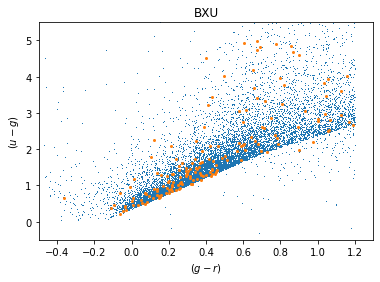

In [30]:
pl.plot(targets_gold_bxu['G'] - targets_gold_bxu['R'],\
        targets_gold_bxu['U'] - targets_gold_bxu['G'],\
        marker=',',\
        lw=0.0)

pl.plot(desilbg_gold_bxu['G'] - desilbg_gold_bxu['R'],\
        desilbg_gold_bxu['U'] - desilbg_gold_bxu['G'],\
        marker='.',\
        markersize=4,\
        lw=0.0)

pl.xlabel(r'$(g-r)$')
pl.ylabel(r'$(u-g)$')

pl.xlim(-.5, 1.3)
pl.ylim(-.5, 5.5)

pl.title('BXU')

In [31]:
desilbg_gold_bxu.write('/global/cscratch1/sd/mjwilson/DESILBGSPEC/vi_cats/desilbg_gold_bxu.fits', format='fits', overwrite=True)

In [34]:
# 100. * 194. / 365.

# Done.